In [23]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [24]:
# Import Datasets
df=pd.read_csv('data\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Id set as index
data= df.set_index('Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# labelencoding of our target column
labelencoder=preprocessing.LabelEncoder()
data['Species']=labelencoder.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


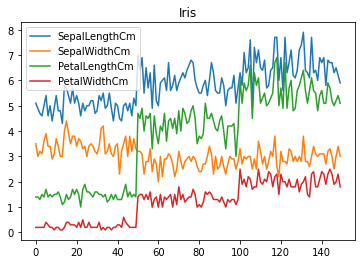

In [27]:
# Data visualization

columns = data.columns.drop(['Species'])
x_data = range(0, data.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, data[column], label=column)
ax.set_title('Iris')
ax.legend()
plt.show()

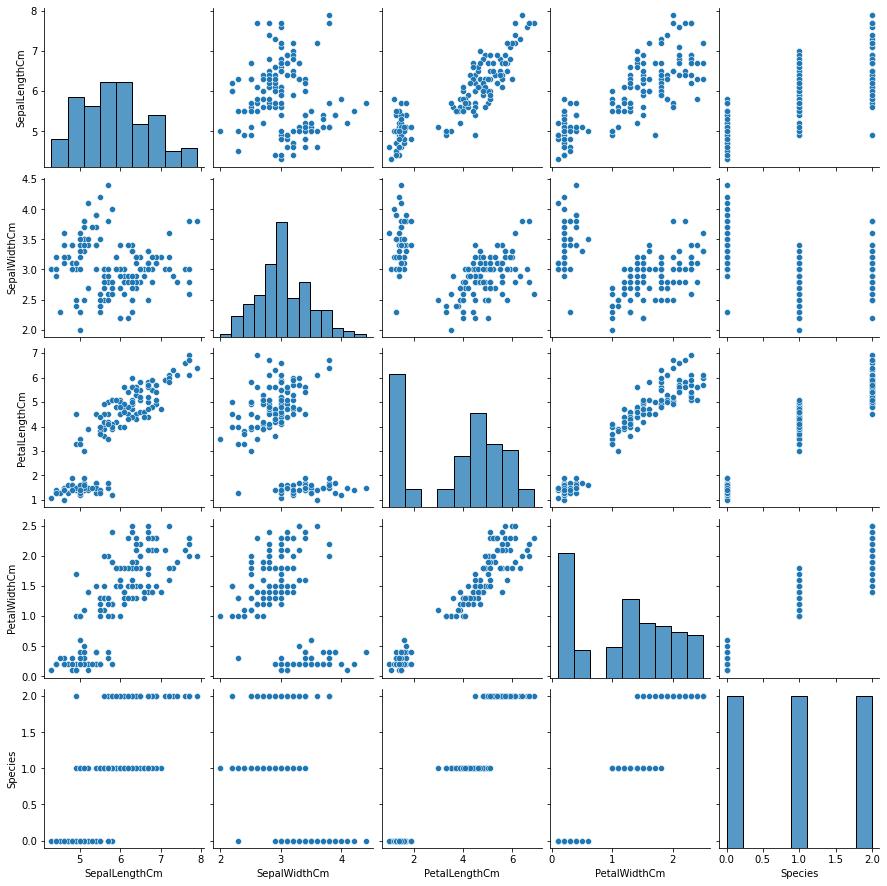

In [29]:
# Data Visualization through pairplot
sns.pairplot(data)

In [31]:
# split data into x & y
# x for features
# y for target
x=data.drop('Species',axis=1)
y=data['Species']
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [18]:
# split data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [32]:
# fit train data into model
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
# check model prediction through testing data 
y_prediction=regression.predict(x_test)
y_prediction

array([ 2.06703909,  0.96488074, -0.14594224,  1.81373137, -0.03780827,
        2.26136881, -0.02684168,  1.3195563 ,  1.28300114,  1.11288966,
        1.54909827,  1.30153965,  1.2127103 ,  1.32986888,  1.33047544,
       -0.07605449,  1.35607655,  1.21563955,  0.0373887 , -0.02449662,
        1.79885764,  1.3946086 ,  0.07528911,  0.02303999,  1.59033372,
       -0.11806588,  0.14915066,  1.1671282 ,  0.90650885,  0.10691577])

In [35]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred =y_prediction)

0.9059663899067814

In [37]:
print("Mean squared error: %.2f" % np.mean((regression.predict(x_test) - y_test) ** 2))

Mean squared error: 0.05
